<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-orden-66/blob/main/Semana_4_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad semanal 4
# PCA
# Fernando Ivan Ramos Esparza A01373377
# Roberto Ferro Salinas A01374849
# Materia: Ciencia y analítica de datos
# Prof. Jobish



# Parte 1

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos. Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

Credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

credit_df = pd.read_csv(Credit)
df = credit_df.copy()
df



,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.corr()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,1.000000,0.026179,0.018543,0.039178,-0.029079,0.018816,-0.030515,-0.011127,-0.018506,-0.002712,...,0.040464,0.016862,0.016836,0.009647,0.008445,0.039130,0.007806,0.000651,0.002997,-0.014049
X1,0.026179,1.000000,0.024744,-0.219115,-0.108193,0.144684,-0.271265,-0.296461,-0.286249,-0.267390,...,0.294063,0.295614,0.290475,0.195307,0.178431,0.210143,0.203256,0.217177,0.219585,-0.153506
X2,0.018543,0.024744,1.000000,0.014353,-0.031479,-0.090860,-0.057720,-0.070862,-0.065949,-0.060055,...,-0.022029,-0.017169,-0.016893,-0.000179,-0.001427,-0.008581,-0.002267,-0.001688,-0.002781,-0.039919
X3,0.039178,-0.219115,0.014353,1.000000,-0.143377,0.175043,0.105386,0.121587,0.114089,0.108867,...,-0.000427,-0.007545,-0.009108,-0.037466,-0.030024,-0.039945,-0.038274,-0.040338,-0.037181,0.028136
X4,-0.029079,-0.108193,-0.031479,-0.143377,1.000000,-0.414227,0.019913,0.024218,0.032543,0.033002,...,-0.023399,-0.025465,-0.021311,-0.005913,-0.008130,-0.003515,-0.012651,-0.001205,-0.006676,-0.024318
X5,0.018816,0.144684,-0.090860,0.175043,-0.414227,1.000000,-0.039442,-0.050166,-0.053055,-0.049730,...,0.051443,0.049401,0.047706,0.025978,0.021794,0.029223,0.021357,0.022790,0.019514,0.013840
X6,-0.030515,-0.271265,-0.057720,0.105386,0.019913,-0.039442,1.000000,0.672145,0.574468,0.538867,...,0.179156,0.180697,0.177062,-0.079246,-0.070112,-0.070467,-0.063968,-0.058145,-0.058668,0.324753
X7,-0.011127,-0.296461,-0.070862,0.121587,0.024218,-0.050166,0.672145,1.000000,0.766770,0.662109,...,0.222257,0.221375,0.219377,-0.080697,-0.059002,-0.055825,-0.046856,-0.037037,-0.036498,0.263570
X8,-0.018506,-0.286249,-0.065949,0.114089,0.032543,-0.053055,0.574468,0.766770,1.000000,0.777115,...,0.227494,0.225465,0.222537,0.001225,-0.066787,-0.053270,-0.046003,-0.035781,-0.035836,0.235573
X9,-0.002712,-0.267390,-0.060055,0.108867,0.033002,-0.049730,0.538867,0.662109,0.777115,1.000000,...,0.246054,0.243007,0.239195,-0.009326,-0.001923,-0.069180,-0.043427,-0.033596,-0.026531,0.216488


In [ ]:
pcs = PCA()
pcs.fit(credit_df.iloc[:, 1:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Standard deviation,166585.075260,115824.701663,37256.816553,27747.103019,20698.682257,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,...,2.065345e+00,9.413389e-01,7.532317e-01,7.323993e-01,5.964295e-01,5.121880e-01,4.940249e-01,4.598526e-01,4.185801e-01,3.855220e-01
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,...,9.385326e-11,1.949648e-11,1.248307e-11,1.180212e-11,7.826770e-12,5.771956e-12,5.369847e-12,4.652663e-12,3.854974e-12,3.270112e-12
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


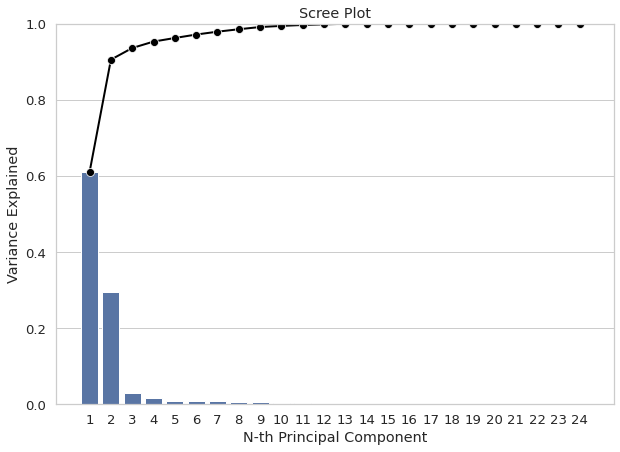

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

### En los primeros 3 componentes principales se concentra el 93.63% de la varianza de nuestros datos, por lo que consideramos que esa debe ser la cantidad mínima de componentes principales (3).

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,...,2.0653,0.9413,0.7532,0.7324,0.5964,0.5122,0.494,0.4599,0.4186,0.3855
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000


## Paso 2: Interprete cada componente principal en términos de las variables originales. Examine la magnitud y la dirección de los coeficientes de las variables originales. Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = credit_df.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X1,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02
X2,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07
X3,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07
X4,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07
X5,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06
X6,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06
X7,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06
X8,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06
X9,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06
X10,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06


In [ ]:
pcsComponents_df.PC1.nlargest(7)

X1     0.491051
X12    0.388615
X13    0.381500
X14    0.372317
X15    0.346509
X16    0.323012
X17    0.308674
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.nlargest(7)

X1     0.869328
X23    0.015369
X22    0.011698
X20    0.010987
X19    0.010809
X21    0.010387
X18    0.005714
Name: PC2, dtype: float64

### Analizando la relación entre las variables de la base de datos y los primeros 5 componentes principales podemos ver que para el componente principal 1 (61.06% de la varianza total) las variables que tienen más peso son el monto de crédito otorgado (X1 con 0.491) y el estado de cuenta (X12-X17 con aprox. cada uno con valores cercanos a 0.3). Variables que tiene sentido que sean las más importantes cuando se estudia el historial crediticio de una persona.

## Paso 3. Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

### Inicialmente graficamos el boxplot para todas las variables de la base de datos.

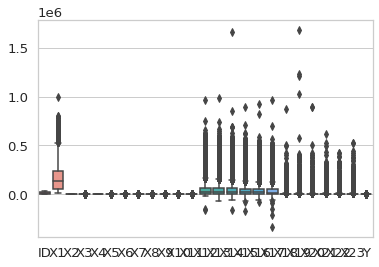

In [ ]:
sns.boxplot(data=df)

### Si analizamos el caso de X1 podemos ver que la mayoría de los créditos otorgados se encuentran en el rango de 50,000 a 240,000, y tenemos valores atípicos como el que llega 1,000,000.

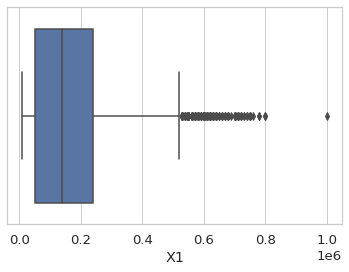

In [ ]:
sns.boxplot(x=df["X1"])

In [ ]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Parte 2

## 1. ¿Cuál es el número de componentes mínimo y por qué?

Consideramos que el número mínimo de componentes principales para este análisis es 3, ya que con los primeros 3 componentes concentramos la mayor parte de la varianza total de los datos.

## 2. ¿Cuál es la variación de los datos que representan esos componentes?

Los primeros 3 componentes principales concentran el 93.63% de la varianza total de la base de datos.

## 3. ¿Cuál es la pérdida de información después de realizar PCA?

Dentro de la información perdida podemos considerar que están las variables categóricas que nosotros omitamos para el análisis, además de los datos que tengan información incompleta, ya que estos se omiten para poder aplicar el PCA.

## 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Tras el análisis, observamos que las variables que más peso tienen en los componentes principales son el monto de crédito otorgado (X1) y el histórico del estado de cuenta (X12-X17); y la que menos tiene es el género (X2). Esto tiene sentido ya que el monto y el estado de cuenta son muy importantes para determinar la probabilidad de otorgar un crédito, mientras que el género no debería tener una injerencia importante en la toma de esta decisión por parte de cualquier institución que otorgue esta clase de créditos.

## 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Esta técnica se utiliza principalmente cuando se tienen bases de datos muy grandes y buscamos reducir el número de variables hasta el mínimo que represente a la base de datos original de la manera más representativa posible.